In [21]:
import torch
import torchvision
from torch import nn
from torchvision.models.resnet import resnet18
from fastai.vision.learner import create_body
import psycopg2
import json
import embeddings
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
model=embeddings.embeddings()

In [3]:
scaler=torchvision.transforms.Resize((224,224))

In [4]:
class emeddings(nn.Module):
    def __init__(self):
        super().__init__()
        model=create_body(resnet18(),pretrained=True, n_in=224, cut=-2)

    def forward(self,x):
        return(model(x))

In [3]:
try:
    connection = psycopg2.connect(
        dbname="postgres",
        user="postmoose",
        password="postmoose",
        host="localhost"
    )
    print("Connected to database successfully")
except psycopg2.Error as e:
    print("Unable to connect to the database:", e)
    


Connected to database successfully


In [70]:
import numpy as np
a1=[3,2,3,1]

In [71]:
something=json.dumps(a1)

In [72]:
json.loads(something)

[3, 2, 3, 1]

In [73]:
t1=torch.tensor([1,2,3])

In [74]:
t1.tolist()

[1, 2, 3]

In [75]:
sample=torch.rand((512))

In [76]:
l1=sample.tolist()

In [77]:
ser=json.dumps(l1)

In [5]:
connection.set_session(autocommit=True)

In [6]:
cur = connection.cursor()

In [84]:
cur.execute("select * from found")

In [99]:
cur.execute("Select * FROM moose LIMIT 0")
colnames = [desc[0] for desc in cur.description]

In [100]:
colnames

['id', 'embedding']

In [105]:
cur.execute(f"insert into moose values(1,'{ser}')")

In [104]:
type(ser)

str

In [108]:
cur.execute(f"insert into moose values(2,'{ser}')")
cur.execute(f"insert into moose values(3,'{ser}')")
cur.execute(f"insert into moose values(4,'{ser}')")
cur.execute(f"insert into moose values(5,'{ser}')")
cur.execute(f"insert into moose values(6,'{ser}')")

In [7]:
cur.execute(f"select * from moose")
val=torch.tensor(json.loads(cur.fetchall()[0][1]))

In [86]:
img=Image.open("../Notebooks/WhatsApp Image 2024-04-07 at 12.38.36 AM.jpeg")

transform = torchvision.transforms.Compose([
torchvision.transforms.PILToTensor(),
torchvision.transforms.Resize((224,224)),
])

img = transform(img)
img=img.type(torch.float32)
img=torch.unsqueeze(img,dim=0)

/home/moose/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [34]:
img.shape

torch.Size([1, 3, 224, 224])

In [51]:
val1=model(img)

In [65]:
val1=val1
val2=val1*2

In [61]:
val1.shape

torch.Size([1, 1024])

In [64]:
torch.unsqueeze(val2,dim=0).shape

torch.Size([1, 512])

In [68]:
model.comparator(val1,val2).item()>0.5

True

In [93]:
something=json.dumps(model(img).tolist()[0])

In [95]:
cur.execute("select * from moose")

In [96]:
cur.fetchone()

(1,
 '[0.9838607907295227, 0.7841185331344604, 0.2941075563430786, 0.6625757813453674, 0.6158497929573059, 0.545159637928009, 0.5211666226387024, 0.03488343954086304, 0.4930036664009094, 0.037532269954681396, 0.5734527111053467, 0.6441750526428223, 0.9627669453620911, 0.20461219549179077, 0.8972882628440857, 0.900736927986145, 0.033455073833465576, 0.9786041378974915, 0.14820152521133423, 0.529294490814209, 0.38724756240844727, 0.5954065918922424, 0.3833039402961731, 0.5377237796783447, 0.2890130281448364, 0.2990325689315796, 0.1282079815864563, 0.34816980361938477, 0.937272310256958, 0.6466018557548523, 0.10534334182739258, 0.19955939054489136, 0.5484102368354797, 0.7084522843360901, 0.7136147618293762, 0.6187329888343811, 0.6995194554328918, 0.39576929807662964, 0.0395580530166626, 0.12804007530212402, 0.2199634313583374, 0.7824494242668152, 0.9898833632469177, 0.09902364015579224, 0.6141992211341858, 0.1680585741996765, 0.6028427481651306, 0.968137264251709, 0.31977736949920654, 0.0

In [100]:
cur.execute(f"UPDATE moose SET embedding='{something}' WHERE id={1}")

In [120]:
cur.execute("select * from moose")

In [121]:
this=cur.fetchall()[-1][1]

In [131]:
cur.execute(f"SELECT embedding FROM moose WHERE id={1}")
    

In [132]:
cur.fetchall()[0][0]

'[0.0, 0.6501747369766235, 0.0, 0.0, 0.34520506858825684, 0.22348517179489136, 0.05096602439880371, 0.6456524133682251, 0.0, 0.0, 0.0, 0.461561918258667, 0.38323935866355896, 0.0, 0.18810313940048218, 0.15628470480442047, 0.3563868999481201, 0.0, 0.0, 1.1739304065704346, 0.0, 0.0, 0.0, 0.14172585308551788, 1.372473955154419, 0.0, 0.0, 0.0, 0.17834243178367615, 0.9637067914009094, 0.0, 0.0, 0.0, 0.4161645174026489, 0.0, 0.2535811960697174, 0.0, 0.29620853066444397, 0.0, 0.0, 0.0, 0.14648516476154327, 0.21416877210140228, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8352419137954712, 0.0, 0.46477583050727844, 0.0, 0.11042531579732895, 0.0, 0.0, 0.0, 0.2526276111602783, 0.0, 0.3438831567764282, 0.4386792480945587, 0.8603119254112244, 0.059280578047037125, 0.0, 0.0, 0.0, 0.0, 0.428837388753891, 0.0005852256435900927, 0.0, 0.0, 0.1180093064904213, 0.011408711783587933, 0.8788532614707947, 0.0, 0.0, 0.01898728497326374, 0.0, 0.0, 0.378935843706131, 0.37447109818458557, 0.23292410373687744, 0.046025726944

 

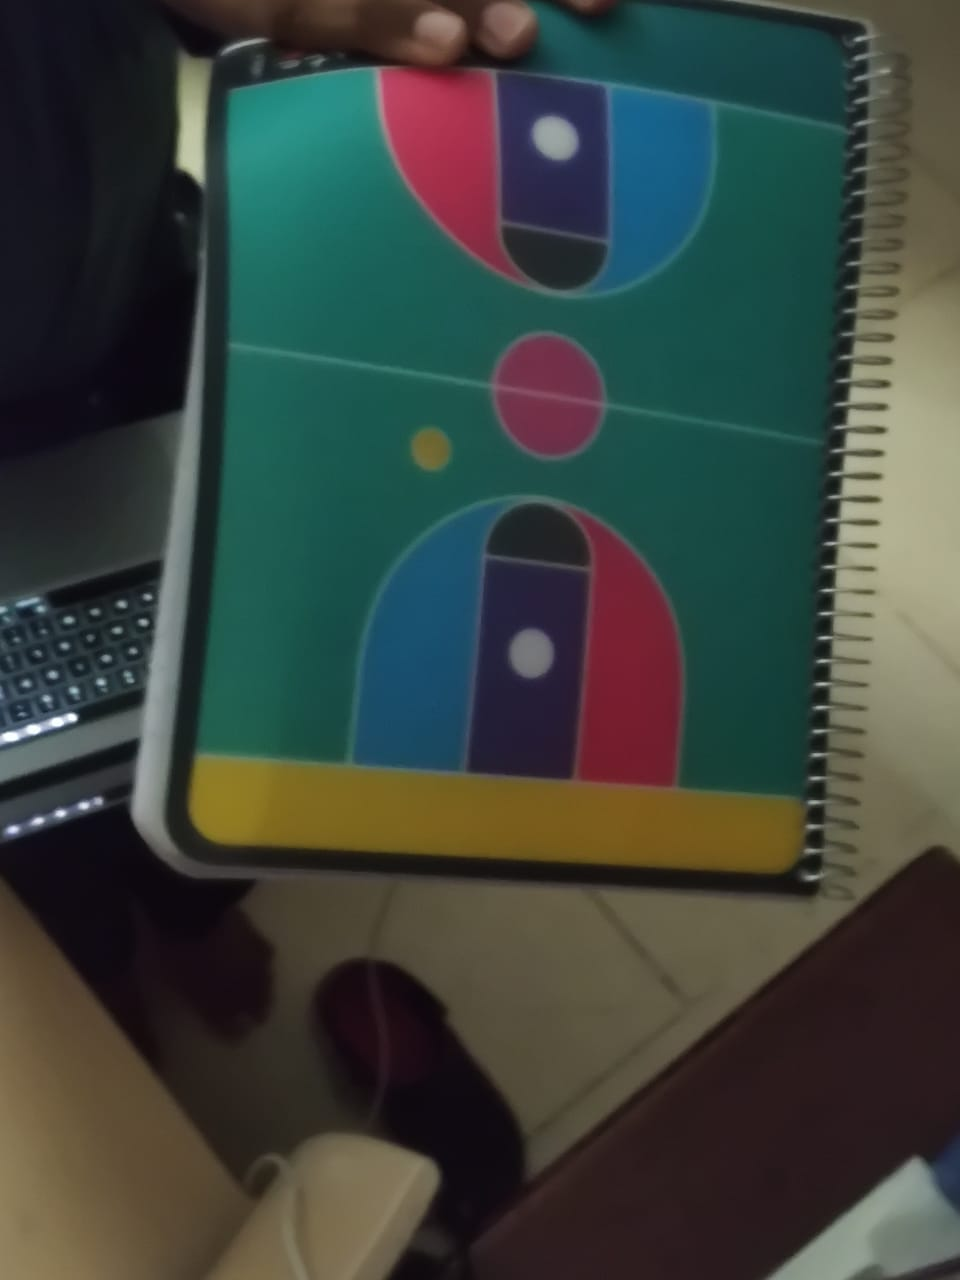

In [82]:
from base64 import b64decode
import io
var2=input()
header, encoded = var2.split("base64,", 1)
data = b64decode(encoded)

In [83]:
image = Image.open(io.BytesIO(data))


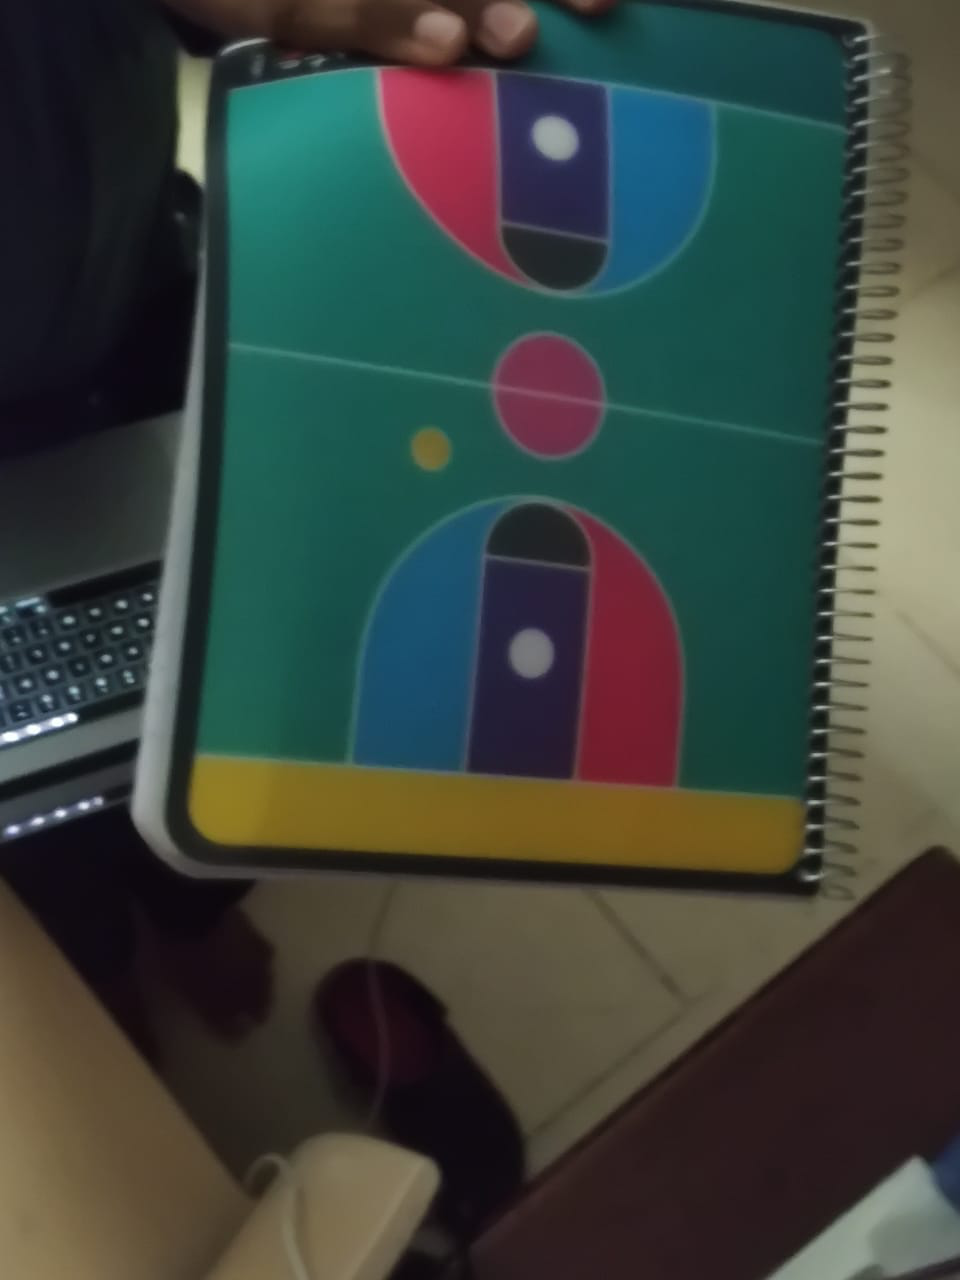

In [84]:
image